<a href="https://colab.research.google.com/github/ThatManRong/RL_Thesis/blob/Pair-Trading/AAL-FB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from scipy.io import loadmat
import math
import statistics
import os


In [3]:
dataDir = '/content/drive/My Drive/Colab Notebooks/AAL/'
mats_AAL = []
for file in os.listdir( dataDir ) :
    mats_AAL.append(loadmat( dataDir+file ) )

dataDir = '/content/drive/My Drive/Colab Notebooks/FB/'
mats_FB = []
for file in os.listdir( dataDir ) :
    mats_FB.append(loadmat( dataDir+file ) )

# dataDir = '/content/drive/My Drive/Colab Notebooks/GOOG/'
# mats_GOOG = []
# for file in os.listdir( dataDir ) :
#     mats_GOOG.append(loadmat( dataDir+file ) )
  
# dataDir = '/content/drive/My Drive/Colab Notebooks/SIRI/'
# mats_SIRI = []
# for file in os.listdir( dataDir ) :
#     mats_SIRI.append(loadmat( dataDir+file ) )

# dataDir = '/content/drive/My Drive/Colab Notebooks/INTC/'
# mats_INTC = []
# for file in os.listdir( dataDir ) :
#     mats_INTC.append(loadmat( dataDir+file ) )

# dataDir = '/content/drive/My Drive/Colab Notebooks/VOD/'
# mats_VOD = []
# for file in os.listdir( dataDir ) :
#     mats_VOD.append(loadmat( dataDir+file ) )

In [4]:
import numpy as np
AAL_BuyPrice = []
AAL_SellPrice = []
FB_BuyPrice = []
FB_SellPrice = []
GOOG_BuyPrice = []
GOOG_SellPrice = []
SIRI_BuyPrice = []
SIRI_SellPrice = []
INTC_BuyPrice = []
INTC_SellPrice = []
VOD_BuyPrice = []
VOD_SellPrice = []
#master_time = []
for i in range(len(mats_AAL)):
  #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
  AAL_BuyPrice.append(np.array(mats_AAL[i]['data']['BuyPrice'][0][0]))
  AAL_SellPrice.append(np.array(mats_AAL[i]['data']['SellPrice'][0][0]))

for i in range(len(mats_FB)):
  #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
  FB_BuyPrice.append(np.array(mats_FB[i]['data']['BuyPrice'][0][0]))
  FB_SellPrice.append(np.array(mats_FB[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_GOOG)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   GOOG_BuyPrice.append(np.array(mats_GOOG[i]['data']['BuyPrice'][0][0]))
#   GOOG_SellPrice.append(np.array(mats_GOOG[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_SIRI)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   SIRI_BuyPrice.append(np.array(mats_SIRI[i]['data']['BuyPrice'][0][0]))
#   SIRI_SellPrice.append(np.array(mats_SIRI[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_INTC)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   INTC_BuyPrice.append(np.array(mats_INTC[i]['data']['BuyPrice'][0][0]))
#   INTC_SellPrice.append(np.array(mats_INTC[i]['data']['SellPrice'][0][0]))

# for i in range(len(mats_VOD)):
#   #master_time.append(np.array(mats[i]['data']['EventTime'][0][0]))
#   VOD_BuyPrice.append(np.array(mats_VOD[i]['data']['BuyPrice'][0][0]))
#   VOD_SellPrice.append(np.array(mats_VOD[i]['data']['SellPrice'][0][0]))

In [5]:
print(AAL_BuyPrice[0])

[[544000 543000 542900 ... 517600 516800 512000]
 [544000 543900 543800 ... 537300 536300 536100]
 [544100 544000 543900 ... 538700 537700 537300]
 ...
 [542500 542400 542300 ... 540700 540600 540500]
 [542500 542400 542300 ... 540700 540600 540500]
 [     0      0      0 ...      0      0      0]]


In [6]:
def clear_master(master):
  result = master
  for i in range(len(master)):
    if len(master[i]) != 23400:
      print(len(master[i]))
      del result[i]
  return result

def flatten_master(master, price_indicator):
  if price_indicator == True:
    result = []
    for i in range(len(master)):
      #print('Percent Done: ', i/len(master))
      for j in range(len(master[i])-1):
        #for k in range(len(master[0][0])):
        result.append((master[i][j][0]-master[i][0][0])/10000)   #Price difference between spot price and price of the beginning. 
  if price_indicator == False:
    result = []
    for i in range(len(master)):
      for j in range(len(master[0])-1):
        #for k in range(len(master[0][0])):
        result.append(master[i][j][0])
  return result


In [7]:
#abc = clear_master(AAL_BuyPrice)
flattened_AAL_BuyPrice = flatten_master(AAL_BuyPrice, price_indicator = True) 
flattened_AAL_SellPrice = flatten_master(AAL_BuyPrice, price_indicator = True) 
flattened_AAL_MidPrice = []
for i in range(len(flattened_AAL_BuyPrice)):
  flattened_AAL_MidPrice.append(0.5*flattened_AAL_BuyPrice[i]+0.5*flattened_AAL_SellPrice[i])

In [8]:
#abc = clear_master(FB_BuyPrice)
flattened_FB_BuyPrice = flatten_master(FB_BuyPrice, price_indicator = True) 
flattened_FB_SellPrice = flatten_master(FB_BuyPrice, price_indicator = True) 
flattened_FB_MidPrice = []
for i in range(len(flattened_FB_BuyPrice)):
  flattened_FB_MidPrice.append(0.5*flattened_FB_BuyPrice[i]+0.5*flattened_FB_SellPrice[i])

In [9]:
print(len(flattened_AAL_MidPrice))
print(len(flattened_FB_MidPrice))    #FB has data available until Dec 7, but AAL has until Dec 31
timestamp = []
for i in range(len(FB_BuyPrice)):
  for j in range(len(FB_BuyPrice[i])-1):
    timestamp.append(j)

5869588
5475240


In [10]:
print(len(timestamp))

5475240


In [11]:
import pandas as pd
data = {'Time': timestamp, 
        'AAL': flattened_AAL_MidPrice[:5475240],
        'FB': flattened_FB_MidPrice}
  
# Convert the dictionary into DataFrame 
data = pd.DataFrame(data) 

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,5))
plt.plot(flattened_AAL_MidPrice[:500])
plt.plot(flattened_FB_MidPrice[:500])
plt.legend(["AAL","FB"])

In [25]:
def split_into_days(df,timestamp):
  days = []
  record = 0
  for i in range(len(timestamp)-1):
    if timestamp[i]>timestamp[i+1]:
      days.append(df.iloc[record:i+1])
      record = i+1
  return days
def pooling(df, pooling_factor):
  temp = df.iloc[len(df)%pooling_factor:]
  
  pooled_AAL_MidPrice = []
  pooled_FB_MidPrice = []
  pooled_timestamp = []
  for i in range(int(len(temp)/pooling_factor)-1):
    
    pooled_AAL_MidPrice.append(np.mean(list(df['AAL'])[i*pooling_factor:(i+1)*pooling_factor]))
    pooled_FB_MidPrice.append(np.mean(list(df['FB'])[i*pooling_factor:(i+1)*pooling_factor]))

    pooled_timestamp.append(i)
  
  result = {'Time': pooled_timestamp, 
        #'BuyPrice': normalized_BuyPrice,
        #'SellPrice' : normalized_SellPrice,
        #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': pooled_BuyVolume,
        # 'SellVolume': pooled_SellVolume,
        'AAL': pooled_AAL_MidPrice, 
        'FB': pooled_FB_MidPrice}
  result = pd.DataFrame(result) 

  return result

def normalize_0_1(df):

  result_AAL = []
  result_FB = []
  AAL_max = np.max(list(df['AAL']))
  AAL_min = np.min(list(df['AAL']))
  FB_max = np.max(list(df['FB']))
  FB_min = np.min(list(df['FB']))

  for elem in list(df['AAL']):
    result_AAL.append((elem - AAL_min)/(AAL_max-AAL_min))
  for elem in list(df['FB']):
    result_FB.append((elem - FB_min)/(FB_max-FB_min))
  new_df = {'Time': list(df['Time']), 
        # 'BuyPrice': flattened_BuyPrice,
        # 'SellPrice' : flattened_SellPrice,
        # #'NumberBuyOrder': flattened_NumberBuyOrder,
        # 'BuyVolume': flattened_NumberBuyVolume,
        # 'SellVolume': flattened_NumberSellVolume,
        'AAL': result_AAL,
        'FB': result_FB}
  data = pd.DataFrame(new_df) 
  return data

In [ ]:
splitted_data = split_into_days(data,timestamp)
splitted_data_pooled = []
i=0
for dataset in splitted_data:
  i+=1
  print("percentage done: ", i/len(splitted_data))
  splitted_data_pooled.append(normalize_0_1(pooling(dataset,30)))

#Co-integration Test

The following codes calculate the p-value for the cointegration test, and the null hypothesis is no cointegration. 

Only correlation is not sufficient here because sometimes we could find a correlated but not cointegrated price relationship. e.g. if two stock prices go up together over time, they are positively correlated. However, if these two stocks trend up in different speeds, the price spread will keep growing rather than oscillating at the equilibrium and hence is non-stationary.


In [27]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
from functools import reduce
from statsmodels.tsa.stattools import coint

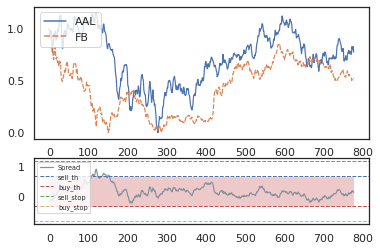

In [50]:
def plot_spread(df, ticker1, ticker2, idx, th, stop):
  
    px1 = df[ticker1].iloc[idx] / df[ticker1].iloc[idx[0]]
    px2 = df[ticker2].iloc[idx] / df[ticker2].iloc[idx[0]]

    sns.set(style='white')
    
    # Set plotting figure
    fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
    
    # Plot the 1st subplot
    sns.lineplot(data=[px1, px2], linewidth=1.2, ax=ax[0])
    ax[0].legend(loc='upper left')
    
    # Calculate the spread and other thresholds
    spread = df[ticker1].iloc[idx] - df[ticker2].iloc[idx]
    mean_spread = spread.mean()
    sell_th     = mean_spread + th
    buy_th      = mean_spread - th
    sell_stop   = mean_spread + stop
    buy_stop    = mean_spread - stop
    
    # Plot the 2nd subplot
    sns.lineplot(data=spread, color='#85929E', ax=ax[1], linewidth=1.2)
    ax[1].axhline(sell_th,   color='b', ls='--', linewidth=1, label='sell_th')
    ax[1].axhline(buy_th,    color='r', ls='--', linewidth=1, label='buy_th')
    ax[1].axhline(sell_stop, color='g', ls='--', linewidth=1, label='sell_stop')
    ax[1].axhline(buy_stop,  color='y', ls='--', linewidth=1, label='buy_stop')
    ax[1].fill_between(idx, sell_th, buy_th, facecolors='r', alpha=0.3)
    ax[1].legend(loc='upper left', labels=['Spread', 'sell_th', 'buy_th', 'sell_stop', 'buy_stop'], prop={'size':6.5})
    
idx = range(0, 777)
plot_spread(splitted_data_pooled[0], 'AAL', 'FB', idx, 0.5, 1)



**Marginal Distributions**: 
If we look into the their marginal distributions, the linear relationship is recognized. (We can also found some clusters as well which maybe useful) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


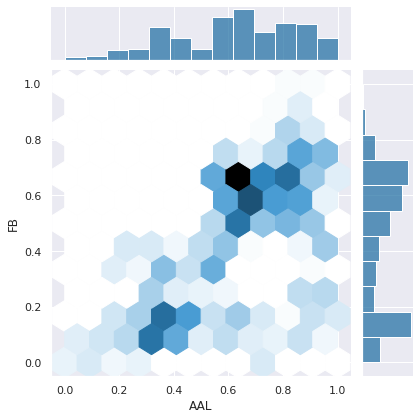

In [49]:
sns.set(style='darkgrid')
sns.jointplot(splitted_data_pooled[0]['AAL'], splitted_data_pooled[0]['FB'],  kind='hex', color='#2874A6')

Here I use $coint$, which is effectively the Engle-Granger two-step cointegration test. It tests for the residuals of an estimated cointegrating pairs (2 time series inputs) with I(1). 

The idea here is linked to a concept in time series analysis called **stationarity**. 

Strong-Form: Joint distribution same, that is $P(x_1, x_2, ..., x_k) = P(x_{1+h},x_{2+h}, ..., x_{k+h}) \forall k, h$. This is unrealistic... 


Weak-Form: more applicable in financial time series with the following criteria:


1.   Expected value of random variable x, i.e. E[x(t)], is independent of time t
2.   Variance Var(x(t)) is a time-independent positive and finite constant
3.   Covariance Cov(x(t),x(s)) is finite and related to the time difference t-s, but neither t nor s

If a time series becomes stationary after first differencing, it is so called integrated of order one I(1).

In [28]:
p_values = []
for data in splitted_data_pooled:
  x = data['AAL']
  #print(x)
  y = data['FB']
  #print(y)
  _, p_value, _ = coint(x, y)
  p_values.append(p_value)

The p_value of AAL-FB pair cointegration is: 0.3651267956519031


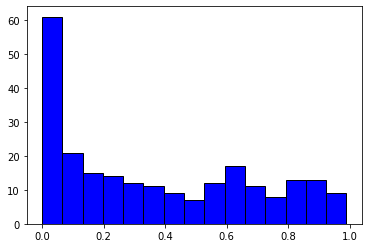

In [29]:
plt.hist(p_values, color = 'blue', edgecolor = 'black',
         bins = 15)
print('The p_value of AAL-FB pair cointegration is: {}'.format(np.mean(p_values)))